Mal die Daten für die 6 aktivsten Nutzer holen...

In [1]:
from src.data.dataset_functions import get_dataframe

dataFrame = get_dataframe(True) # sample data only

providing ../data/raw/2022_place_canvas_history-000000000050.csv ...
../data/raw/2022_place_canvas_history-000000000050.csv is already in data/raw


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/12 21:56:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
dataFrame.printSchema()
dataFrame.show(1)

root
 |-- user_id: string (nullable = true)
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- t: long (nullable = true)
 |-- pixel_color: string (nullable = true)

+--------------------+---+----+---+-----------+
|             user_id|  x|   y|  t|pixel_color|
+--------------------+---+----+---+-----------+
|vKtmwRQwAYtw5poO4...|804|1992|  0|    #FF3881|
+--------------------+---+----+---+-----------+
only showing top 1 row



In [3]:
from src.features.feature_functions import group_dataframe_by_user
groupedFrame = group_dataframe_by_user(dataFrame)
groupedFrame.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- count: long (nullable = false)
 |-- collect_list(x): array (nullable = false)
 |    |-- element: integer (containsNull = false)
 |-- collect_list(y): array (nullable = false)
 |    |-- element: integer (containsNull = false)
 |-- collect_list(t): array (nullable = false)
 |    |-- element: long (containsNull = false)
 |-- collect_list(pixel_color): array (nullable = false)
 |    |-- element: string (containsNull = false)



In [4]:
dataCollection = groupedFrame.take(5)

In [7]:
print(dataCollection)

[Row(user_id='AxBTmhBMbr1sbDw/2liFySQ4h6lH1bZSyjS9RtcBxvMyafVj+e2grv9teqbU9JkFDCPlgIfWH+L2CzKeSBdB4w==', count=20, collect_list(x)=[1447, 1617, 655, 612, 1575, 1287, 1636, 1926, 658, 1310, 1403, 1299, 777, 586, 1741, 584, 1611, 1765, 788, 656], collect_list(y)=[5, 16, 1896, 1917, 7, 8, 21, 19, 14, 10, 2, 20, 8, 1931, 10, 26, 33, 8, 11, 1884], collect_list(t)=[184, 1417, 1726, 1726, 1726, 801, 492, 801, 2035, 1109, 2344, 2653, 2344, 2653, 2344, 3577, 3269, 3577, 2961, 2961], collect_list(pixel_color)=['#FFA800', '#FF4500', '#B44AC0', '#E4ABFF', '#FFA800', '#3690EA', '#FFFFFF', '#BE0039', '#FF4500', '#2450A4', '#FFA800', '#FFFFFF', '#FFA800', '#9C6926', '#FFA800', '#000000', '#2450A4', '#FFA800', '#000000', '#E4ABFF']), Row(user_id='X8gpDfO6+Z87SKKTyoQs5vE6vbsjplXI78sASTOPf6gIXkgbdWk5zlu6O/qzkS8rLNvDsnvZo4g+TV0AeMDnmQ==', count=15, collect_list(x)=[902, 939, 914, 927, 935, 914, 1642, 919, 923, 1685, 904, 932, 925, 921, 925], collect_list(y)=[1844, 1858, 1836, 1852, 1863, 1841, 214, 1858,

[[[1447, 1617, 655, 612, 1575, 1287, 1636, 1926, 658, 1310, 1403, 1299, 777, 586, 1741, 584, 1611, 1765, 788, 656], [5, 16, 1896, 1917, 7, 8, 21, 19, 14, 10, 2, 20, 8, 1931, 10, 26, 33, 8, 11, 1884], [184, 1417, 1726, 1726, 1726, 801, 492, 801, 2035, 1109, 2344, 2653, 2344, 2653, 2344, 3577, 3269, 3577, 2961, 2961]], [[902, 939, 914, 927, 935, 914, 1642, 919, 923, 1685, 904, 932, 925, 921, 925], [1844, 1858, 1836, 1852, 1863, 1841, 214, 1858, 1858, 228, 1865, 1850, 1843, 1868, 1861], [1422, 1727, 212, 2030, 817, 514, 2637, 2331, 1121, 2974, 2974, 2974, 2974, 3276, 3577]], [[998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998, 998], [1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466, 1466], [420, 60, 420, 1860, 1860, 780, 2580, 2220, 2220, 1140, 2940, 1500, 1500, 3300, 3300]], [[920, 958, 936, 1650, 935, 917, 903, 919, 932, 909, 920, 916, 933, 930, 924], [1852, 1831, 1861, 227, 1863, 1836, 1850, 1872, 1757, 1856, 1832, 1851, 1838, 1847, 

/home/vscode/.local/lib/python3.9/site-packages/mpl_toolkits/mplot3d/art3d.py:906: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/vscode/.local/lib/python3.9/site-packages/mpl_toolkits/mplot3d/art3d.py:908: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


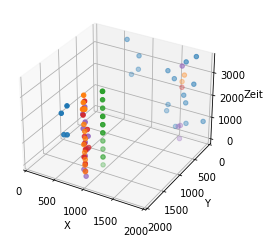

<Axes3DSubplot:xlabel='X', ylabel='Y'>

In [5]:
from src.visualization.visuialization_functions import plot_list_of_pixellist

userpixel = []
for row in dataCollection:
    user_id , count ,xs , ys , ts , pixel_color = list(row)
    userpixel.append([xs,ys,ts])
print(userpixel)
plot_list_of_pixellist(userpixel)


[[1447, 1617, 655, 612, 1575, 1287, 1636, 1926, 658, 1310, 1403, 1299, 777, 586, 1741, 584, 1611, 1765, 788, 656], [5, 16, 1896, 1917, 7, 8, 21, 19, 14, 10, 2, 20, 8, 1931, 10, 26, 33, 8, 11, 1884], [184, 1417, 1726, 1726, 1726, 801, 492, 801, 2035, 1109, 2344, 2653, 2344, 2653, 2344, 3577, 3269, 3577, 2961, 2961]]


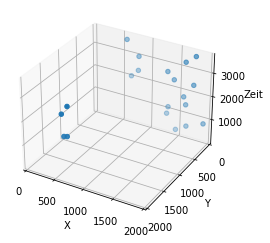

<Axes3DSubplot:xlabel='X', ylabel='Y'>

In [6]:
from src.visualization.visuialization_functions import plot_pixellist

print(userpixel[0])
plot_pixellist(userpixel[0])

# Frage: Was kann man mit nach Nutzer gruppierten Pixeldaten noch so machen?

### Wie viele Pixel hat der Nutzer gesetzt? -> Nach gesetzter Pixelanzahl gruppieren -> Wie viele Nutzer haben X Pixel gesetzt?

In [7]:
from src.features.feature_functions import group_dataframe_by_columns
# Vom Nutzergruppierten Frame können wir erstmal alle Pixeldaten droppen, die brauchen wir nicht zum weiter rechen. Nur die Anzahl pro Nutzer.
# group_dataframe_by_columns hängt automatisch eine neue 'count' Spale an. Die neue wird die Nutzer pro Pixelhäufigkeit zählen. Die alte hat die Pixel pro Nutzer gezählt
# 2x 'count' als Spaltenname muss also umbenannt werden
droppedFrame = groupedFrame.drop('collect_list(x)').drop('collect_list(y)').drop('collect_list(t)').drop('collect_list(pixel_color)').withColumnRenamed('count','pixelcount').drop('user_id')

groupedbypixelcountFrame = group_dataframe_by_columns(droppedFrame,['pixelcount'])

groupedbypixelcountFrame.printSchema()




root
 |-- pixelcount: long (nullable = false)
 |-- count: long (nullable = false)



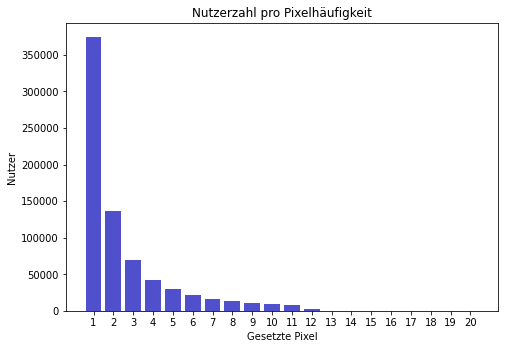

In [8]:

datacollect = groupedbypixelcountFrame.collect()
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for row in datacollect:
    pixelcount,usercount = list(row)
    ax.bar(pixelcount,usercount,color='#5050cc')
ax.set_xticks(np.arange(1,21,1))
ax.set_title('Nutzerzahl pro Pixelhäufigkeit')
ax.set_ylabel('Nutzer')
ax.set_xlabel('Gesetzte Pixel')
plt.show()